In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
conn=sqlite3.connect("Northwind.db")
query='''SELECT PRODUCTNAME, SUM(PRICE*QUANTITY) AS REVENUE
FROM OrderDetails od
JOIN PRODUCTS P ON P.PRODUCTID=OD.PRODUCTID
GROUP BY od.productid
order by revenue desc
limit 10
'''

In [11]:
top_products=pd.read_sql_query(query,conn)# data,path
print(top_products)

               ProductName   REVENUE
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00
5             Alice Mutton  12909.00
6   Gnocchi di nonna Alice  10222.00
7   Mozzarella di Giovanni   9396.00
8             Vegie-spread   9175.10
9    Manjimup Dried Apples   8639.00


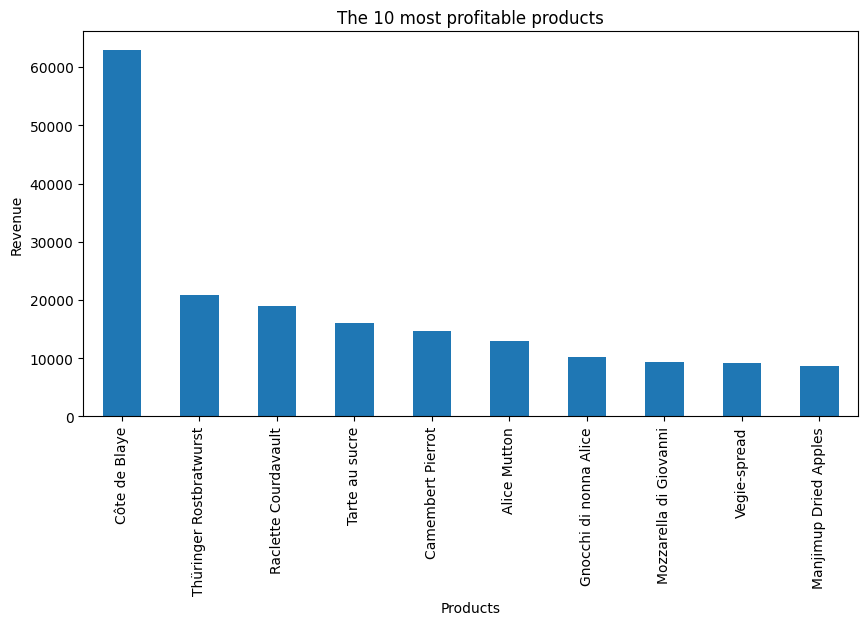

In [26]:
#from pickle import FALSE
top_products.plot(x="ProductName",y="REVENUE",kind="bar",figsize=(10,5),legend=False)
plt.title("The 10 most profitable products")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.xticks()
plt.show()

In [22]:
query2='''
SELECT FirstName || " "|| LastName AS Employee,COUNT(*) AS Total
FROM Orders o
JOIN Employees e ON e.EmployeeID=o.EmployeeID
GROUP BY o.EmployeeID
ORDER BY Total DESC
LIMIT 10
'''


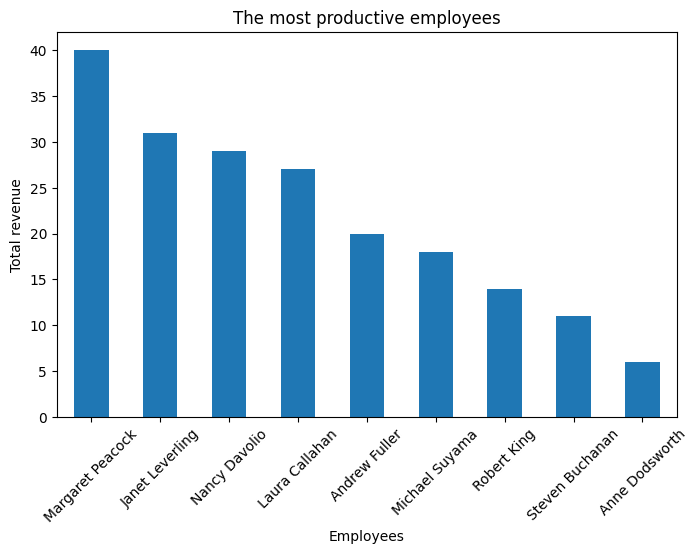

In [24]:
top_employees=pd.read_sql_query(query2,conn)
top_employees.plot(x="Employee",y="Total",kind="bar",figsize=(8,5),legend=False)
plt.xlabel("Employees")
plt.ylabel("Total revenue")
plt.title("The most productive employees")
plt.xticks(rotation=45)
plt.show()